# Predicting sed_basin using ML

for NSF Bedclasses


In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

In [3]:
from matplotlib import rc,rcParams

# rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


## Read in sampled line (from Borthwick)

In [4]:
import sys

basedir = '/Users/dporter/Documents/Research/Projects/bedclass/'
sys.path.append(basedir)

from bedclass.custom_funcs import *

In [5]:
datadir = 'data'
infile = os.path.join(basedir, datadir, 'interim/upper_thwaites_model_sed_sampled.csv')

df = read_UTG_line(infile)
df.head()

,index,OBJECTID,freeair_grav,flight_elev,PSX,PSY,sed_basin,classvalue,water,mag,reflectivity,swathradar,roughness,bedmachine,beta,boug,Dist
0,125,126,-17.46,1455.41,-1424985.00,-476438.67,NaN,NaN,0.003148,152.482147,NaN,NaN,141.990021,-1098.349854,9.666136,39.247025,0.000000
1,124,125,-17.75,1452.55,-1424466.39,-476250.62,0.0,0.0,0.002745,154.932159,NaN,NaN,183.968094,-1112.902588,9.649867,39.286633,483.315145
2,123,124,-17.97,1451.12,-1424013.19,-476079.65,0.0,0.0,0.002920,156.640793,NaN,NaN,211.233963,-1126.830200,9.635189,39.323444,903.028737
3,122,123,-18.17,1453.39,-1423561.81,-475900.02,0.0,0.0,0.003525,158.488022,NaN,NaN,227.344452,-1141.264526,9.620063,39.362675,1317.126512
4,121,122,-18.36,1454.39,-1423049.74,-475680.72,0.0,0.0,0.003270,160.866257,NaN,NaN,217.591660,-1158.001465,9.602173,39.411026,1779.860988


## Plot samples UTG line

In [64]:
# Find basin edges
from bedclass.custom_funcs import define_basin_locs

print(define_basin_locs(df, 'classvalue'))

[(21.41328048100085, 33.370376058281586), (33.370376058281586, 72.15968251190077), (72.15968251190077, 94.45343856173103), (94.45343856173103, 124.7397930965475), (124.7397930965475, 140.82466271765398), (140.82466271765398, 153.70404922771326), (153.70404922771326, 160.65670286057468), (160.65670286057468, 173.03772056207697), (173.03772056207697, 183.5316703255228)]


### Plot profiles

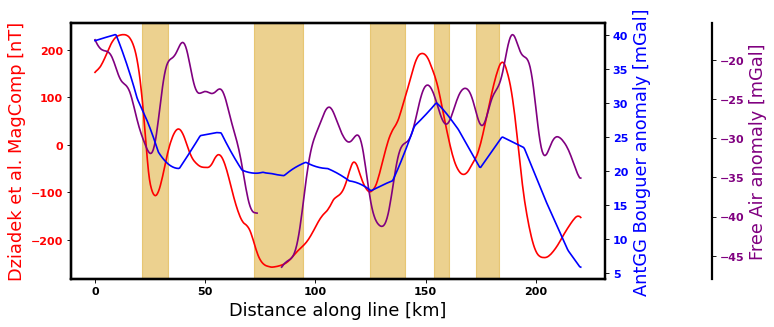

In [63]:
from bedclass.custom_funcs import line_overplot_3

my_vars= ['mag', 'freeair_grav', 'boug']
var_labels = ['Dziadek et al. MagComp [nT]', 
              'Free Air anomaly [mGal]', 
              'AntGG Bouguer anomaly [mGal]']
x_var = 'Dist'
x_label = 'Distance along line [km]'
my_colors = ['red', 'purple', 'blue']
my_file = 'figs/lineplot_UTG_sample_potfields.png'

line_overplot_3(df, my_vars, var_labels, x_var, x_label, my_colors, my_file)

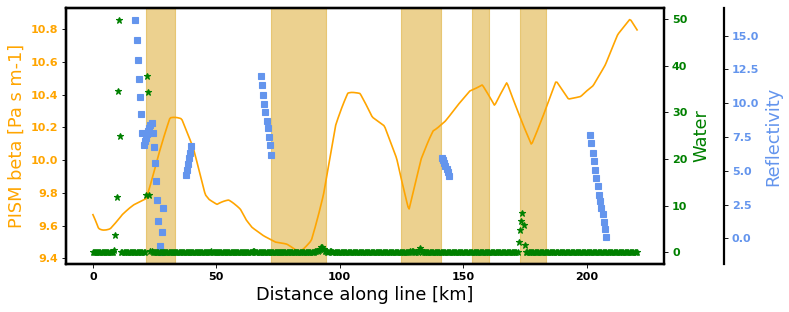

In [58]:
my_vars= ['beta', 'reflectivity', 'water']
var_labels = ['PISM beta [Pa s m-1]', 
              'Reflectivity', 
              'Water']
my_colors = ['orange', 'cornflowerblue', 'green']
my_file = 'figs/lineplot_UTG_sample_ClassBeta.png'

line_overplot_3(df, my_vars, var_labels, x_var, x_label, my_colors, my_file, True)

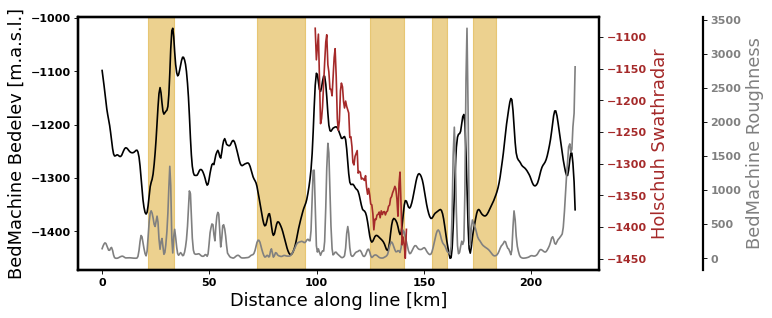

In [61]:
my_vars= ['bedmachine', 'roughness', 'swathradar']
var_labels = ['BedMachine Bedelev [m.a.s.l.]', 
              'BedMachine Roughness', 
              'Holschuh Swathradar']
my_colors = ['black', 'grey', 'brown']
my_file = 'figs/lineplot_borthwickmuto_sample_BedMachine.png'

line_overplot_3(df, my_vars, var_labels, x_var, x_label, my_colors, my_file)

# Appendix


